In [2]:
!pip install yfinance

     -------------------------------------- 59.2/59.2 kB 224.5 kB/s eta 0:00:00
     ------------------------------------ 112.2/112.2 kB 502.1 kB/s eta 0:00:00
     ------------------------------------ 499.4/499.4 kB 919.4 kB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [3]:
import yfinance as yf

# Download historical stock prices
symbol = "AAPL"  # Apple stock symbol
start_date = "2015-01-01"
end_date = "2021-12-31"
data = yf.download(symbol, start=start_date, end=end_date)

# Save the data to a CSV file
data.to_csv("stock_prices.csv")


[*********************100%***********************]  1 of 1 completed


Epoch 1/50
43/43 [==============================] - 20s 202ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 2/50
43/43 [==============================] - 6s 140ms/step - loss: 6.2418e-04 - val_loss: 0.0032
Epoch 3/50
43/43 [==============================] - 6s 139ms/step - loss: 5.9478e-04 - val_loss: 0.0109
Epoch 4/50
43/43 [==============================] - 6s 137ms/step - loss: 5.6728e-04 - val_loss: 0.0043
Epoch 5/50
43/43 [==============================] - 5s 121ms/step - loss: 4.8965e-04 - val_loss: 0.0075
Epoch 6/50
43/43 [==============================] - 5s 127ms/step - loss: 4.9412e-04 - val_loss: 0.0013
Epoch 7/50
43/43 [==============================] - 6s 129ms/step - loss: 5.3781e-04 - val_loss: 0.0011
Epoch 8/50
43/43 [==============================] - 6s 134ms/step - loss: 4.2770e-04 - val_loss: 0.0026
Epoch 9/50
43/43 [==============================] - 6s 136ms/step - loss: 3.6980e-04 - val_loss: 0.0052
Epoch 10/50
43/43 [==============================] - 6s 136ms/step 

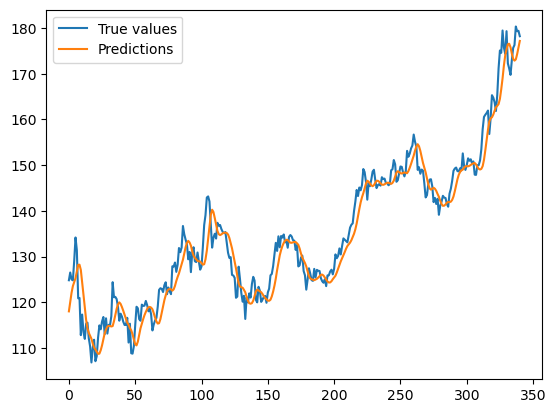

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the data
data = pd.read_csv("stock_prices.csv")

# Select the "Close" column as the target variable
target = data["Close"].values.reshape(-1, 1)

# Normalize the data using a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
target = scaler.fit_transform(target)

# Define the number of timesteps and features
timesteps = 60
features = 1

# Convert the data into input/output pairs
X, y = [], []
for i in range(timesteps, len(target)):
    X.append(target[i-timesteps:i, 0])
    y.append(target[i, 0])
X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Define the model architecture
model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(timesteps, features)),
    Dropout(0.2),
    LSTM(units=64, return_sequences=True),
    Dropout(0.2),
    LSTM(units=64),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Generate predictions on the test set
predictions = model.predict(X_test)

# Rescale the predictions and true values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.plot(y_test, label="True values")
plt.plot(predictions, label="Predictions")
plt.legend()
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# Calculate performance metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 14.30886768814944
RMSE: 3.782706397296708
MAE: 2.9316214284589215
R-squared: 0.9440879826239843
